## System A: 2-D tomographic system

Consider a simpliﬁed 2-D tomographic system. The
ﬁeld of view (FOV) is a disk of unit radius in the plane. The kernel for the imaging system is given by

\begin{align}
h_m(x,y) = \begin{cases}
1, & \text{for } \left(-1 + \frac{m-1}{16}\right) < y \leq \left(-1 + \frac{m}{16}\right) \\
0, & \text{otherwise}.
\end{cases}
\end{align}

In other words, each sensitivity function is equal to $1$ in a horizontal strip of width $1/16$, and zero outside this strip. The strips are non-overlapping and stack up to cover the whole unit disk. This corresponds to a $32$ pixel detector oriented vertically with perfect collimation. To get the next $32$ sensitivity functions we rotate these by $\pi/16$. We continue rotating by $\pi/16$ to generate a total of $M = 32 \times 16$ sensitivity functions.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Part a: Population generation
The first step is to generate a population of objects. Note
here that it is important that there should be variability in your population, else the network may just memorize how to segment the tumor in your training set, and would fail when given a new image with a new tumor.

Saved 50/500 realizations.
Saved 100/500 realizations.
Saved 150/500 realizations.
Saved 200/500 realizations.
Saved 250/500 realizations.
Saved 300/500 realizations.
Saved 350/500 realizations.
Saved 400/500 realizations.
Saved 450/500 realizations.
Saved 500/500 realizations.
All 500 realizations have been saved to 'objects'.


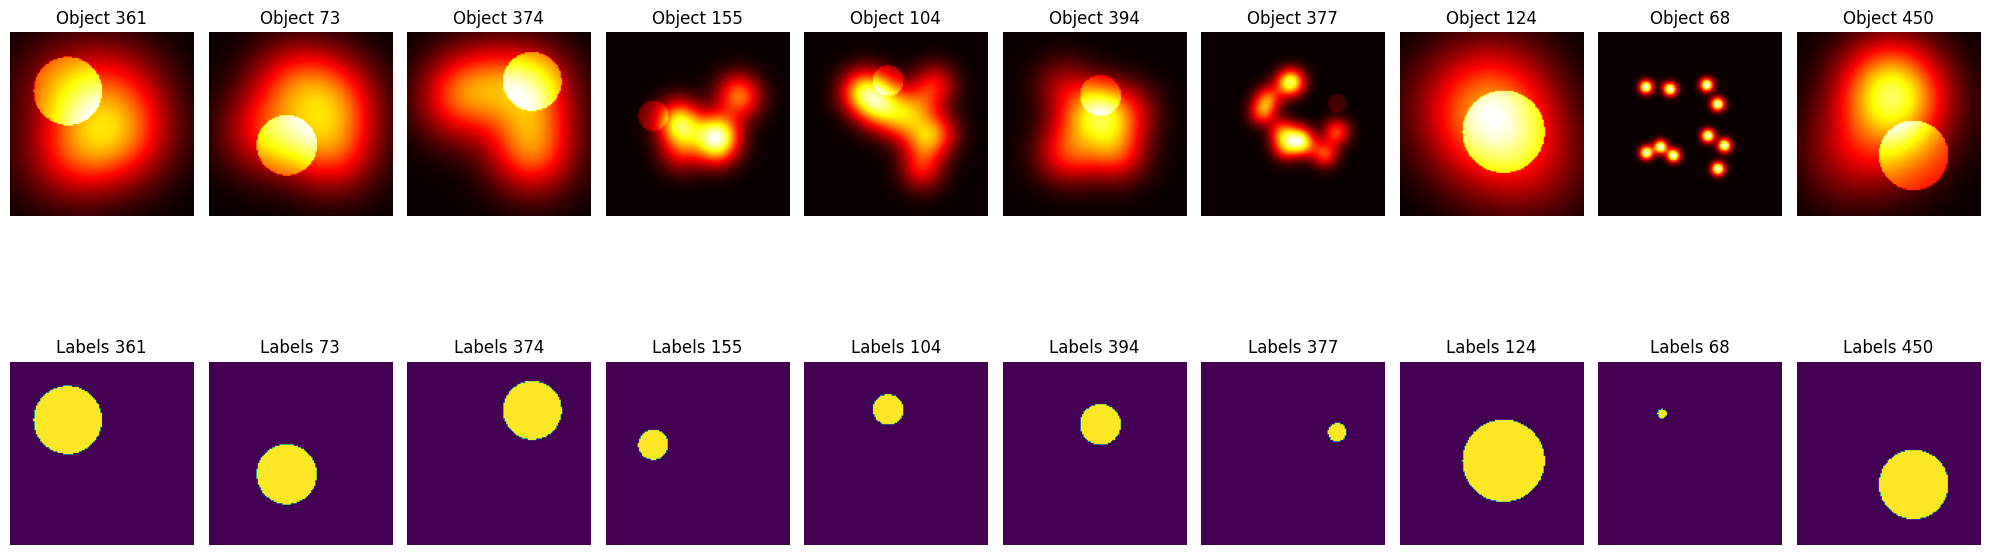

In [5]:
import datagen

# Set the random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Directory for saving results
output_dir = "objects"
os.makedirs(output_dir, exist_ok=True)

grid_size = 128
N = 10
J = 500  # Number of realizations

for j in range(J):
    # Generate object and segmentation labels
    f, signal_mask = datagen.generate_object(grid_size, N)
    labels = datagen.generate_segmentation_labels(signal_mask)

    # Save the object and labels
    np.save(os.path.join(output_dir, f"object_{j}.npy"), f)
    np.save(os.path.join(output_dir, f"labels_{j}.npy"), labels)

    # Optionally print progress
    if (j + 1) % 50 == 0:
        print(f"Saved {j + 1}/{J} realizations.")

print(f"All {J} realizations have been saved to '{output_dir}'.")

# Randomly showcase 10 cases

# List all saved objects and labels
object_files = [f for f in os.listdir(output_dir) if f.startswith("object_") and f.endswith(".npy")]
label_files = [f for f in os.listdir(output_dir) if f.startswith("labels_") and f.endswith(".npy")]

# Ensure the files are sorted (so objects and labels match by index)
object_files.sort()
label_files.sort()

# Randomly sample 10 indices
np.random.seed(42)  # Set seed for reproducibility
sampled_indices = np.random.choice(len(object_files), 10, replace=False)

# Visualize the sampled objects and labels
plt.figure(figsize=(20, 8))

for i, idx in enumerate(sampled_indices):
    # Load object and label
    obj_path = os.path.join(output_dir, object_files[idx])
    lbl_path = os.path.join(output_dir, label_files[idx])
    obj = np.load(obj_path)
    lbl = np.load(lbl_path)

    # Plot the object
    plt.subplot(2, 10, i + 1)
    plt.imshow(obj, extent=(-1, 1, -1, 1), cmap="hot")
    plt.title(f"Object {idx}")
    plt.axis("off")

    # Plot the segmentation labels
    plt.subplot(2, 10, i + 11)
    plt.imshow(lbl, extent=(-1, 1, -1, 1), cmap="viridis")
    plt.title(f"Labels {idx}")
    plt.axis("off")

plt.tight_layout()
plt.show()



## Part b: Image generation

Using the imaging system model for System B, conduct
the following:

i. Generate the system matrix: Simulate the forward model for the system using the
expansion function of the object as pixels with the following dimensions: $8 \times 8$, $16 \times 16$, $32 \times 32$, $64 \times 64$.

The kernel for the imaging system is given by

\begin{align}
h_m(x,y) = \begin{cases}
1, & \text{for } \left(-1 + \frac{m-1}{16}\right) < y \leq \left(-1 + \frac{m}{16}\right) \\
0, & \text{otherwise}.
\end{cases}
\end{align}

this is repeated 16 times to get the full set of sensitivity functions, each time rotating by $\pi/16$.

In [ ]:
import systema

# Generate H
grid_size = 128
num_strips = 32
num_rotations = 16
H = systema.generate_system_matrix(grid_size, num_strips, num_rotations)

